In [14]:
import os
import datetime

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

from google.colab import files
from google.colab import drive


drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
data_path = os.path.join("/content/gdrive/My Drive", "Colab Notebooks/data/")
dataset_path = os.path.join(data_path, "data_hackathon_v04.csv")
dataset_time_path = os.path.join(data_path, "data_hackathon_time.csv")
dataset_labeled_path = os.path.join(data_path, "labeled_data.csv")
districts_time_path = os.path.join(data_path, "districts_time_data.csv")
time_demand_path = os.path.join(data_path, "time_demand_only.csv")



In [8]:
df = pd.read_csv(time_demand_path, sep=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4433 entries, 0 to 4432
Data columns (total 3 columns):
Unnamed: 0    4433 non-null int64
time          4433 non-null object
demand        4433 non-null int64
dtypes: int64(2), object(1)
memory usage: 104.0+ KB


In [0]:
dataset = df

In [69]:
rand_seed = 100
np.random.seed(rand_seed)

def print_shapes(arrays, arr_names=[]):
    """
    Print shapes of numpy arrays or length of lists.
    :param list of np.ndarrays or lists arrays:
    :param list of str arr_names:
    """
    for i, array in enumerate(arrays):
        if len(arr_names) > i:
            arr_name = arr_names[i]
        else:
            arr_name = ""
        try:
            print(i + 1, arr_name, "shape =", array.shape, "Type =",
                  type(array), "Dtype =", array.dtype)
        except AttributeError:
            print(i + 1, arr_name, "shape =", len(array), "Type =",
                  type(array), "Elements type =", type(array[0]))
                 
def shuffle_in_unison(a, b):
    assert len(a) == len(b)
    shuffled_a = np.empty(a.shape, dtype=a.dtype)
    shuffled_b = np.empty(b.shape, dtype=b.dtype)
    permutation = np.random.permutation(len(a))
    for old_index, new_index in enumerate(permutation):
        shuffled_a[new_index] = a[old_index]
        shuffled_b[new_index] = b[old_index]
    return shuffled_a, shuffled_b
  
def create_Xt_Yt(X, y, percentage=0.9):
    p = int(len(X) * percentage)
    X_train = X[0:p]
    Y_train = y[0:p]
     
    X_train, Y_train = shuffle_in_unison(X_train, Y_train)
 
    X_test = X[p:]
    Y_test = y[p:]
    return X_train, X_test, Y_train, Y_test

  
window = 72 # 720 # in houres
step = 1


X, Y = [], []
for i in range(0, len(dataset), step): 
    try:
        x_i = dataset.demand[i:i + window]
        y_i = dataset.demand[i + window]  
    except Exception as e:
        print(e)
        break
    X.append(x_i)
    Y.append(y_i)
    
X, Y = np.array(X), np.array(Y)
X_train, X_test, Y_train, Y_test = create_Xt_Yt(X, Y, 0.85)

4433


In [70]:
print_shapes([X_train, X_test, Y_train, Y_test])

1  shape = (3706, 72) Type = <class 'numpy.ndarray'> Dtype = int64
2  shape = (655, 72) Type = <class 'numpy.ndarray'> Dtype = int64
3  shape = (3706,) Type = <class 'numpy.ndarray'> Dtype = int64
4  shape = (655,) Type = <class 'numpy.ndarray'> Dtype = int64


In [71]:
%%time
model = GradientBoostingRegressor(n_estimators=100, max_depth=6)
model.fit(X_train, Y_train)


CPU times: user 4.08 s, sys: 6.94 ms, total: 4.09 s
Wall time: 4.09 s


In [72]:
Y_predict = model.predict(X_test)

mae = metrics.mean_absolute_error(Y_test, Y_predict)
print("\nMae on train set: ", mae)


Mae on train set:  24.449031643335005


(655,)
655
(655,)
(655,)


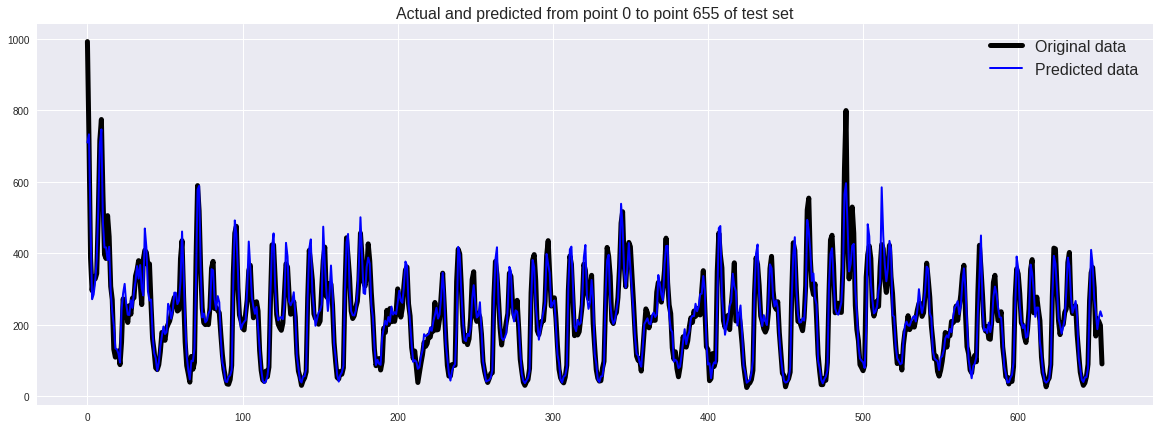

In [73]:

pred = model.predict(np.array(X_test))
print(pred.shape)

FROM = 0
TO = FROM + len(pred)
print(TO)
original = Y_test
predicted = pred
print(predicted.shape)
print(original.shape)
fig, ax = plt.subplots(figsize=(20, 7))

ax.plot(original, color='black', label = 'Original data', linewidth=5, ls='-')
ax.plot(predicted, color='blue', label = 'Predicted data', linewidth=2, ls='-')
ax.legend(loc=0, fontsize=16)
ax.set_title('Actual and predicted from point %d to point %d of test set' % (FROM, TO), fontsize=16)
plt.show()